# Links to Github and Streamlit

Github: https://github.com/mohamadalkawadri/mohamadalkawadri-IND320-project

Streamlit: https://mohamadalkawadri-ind320.streamlit.app/

# AI usage

I used AI in plotting each column separately and all columns together, I also used it to help me with solving streamlit, it was used directly in Vscode so there is no logs.

# Log describing the compulsory work

My experince with jupyter notebook was very good for exploring and visualising the data. In file Project.ipynb we imported importand libraries to show plotting of the CSV file that we got and to get a better understanding of what we dealing with before we run into the Streamlit app.

For Streamlit it was very easy to set up web pages, however I had to read a lot in the documentation to find out how things works in the different web pages and for doing the tasks correctly. I used Chatgpt to help me sometimes fixing the code i wrote and to help plotting the plots. The app mirrors the notebook logic and reads the same CSV from the repo. I implemented in Streamlit the @st.cache_data to avoid repeated parsing and created three pages. Page 2 represents a table of different variables where it shows one row per numeric column with a LineChartColumn and the first month chart of the data. Page 3 represent an interactive plotting where we can select a column of all columns or selecting all coumns at once. We can select as  well the month range where we can adjust it as we like. I used altair to make the plots in the streamlit app and it worked very well. Page 3 is an Altair line chart with a st.selectbox to pick one column or all columns, in addition to st.select_slider for month ranges where it defaulting to the first month. Then I added titles, axis, labels, legends and tooltips so the chart is understandable without extra explanation.

Depolying the application to Streamlit was straight forward and I didn't need any documentations to do it. The only hiccups were missing packages and path issues, fixed by updating the requirements.txt file and using relative paths with the CSV placed next to Home.py file.

# Data exploration

In [1]:
import pandas as pd
data = pd.read_csv('open-meteo-subset.csv')

In [2]:
data.head()

,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01T00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01T01:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01T02:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01T03:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01T04:00,-2.7,0.0,10.6,22.8,284


# Data visualisation

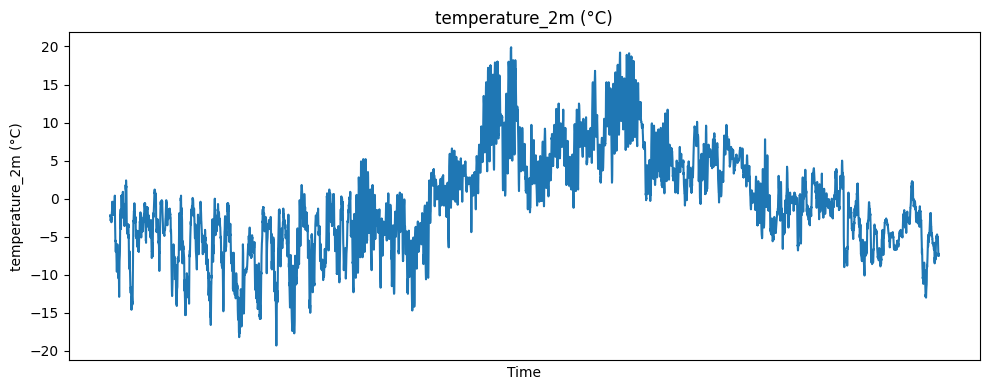

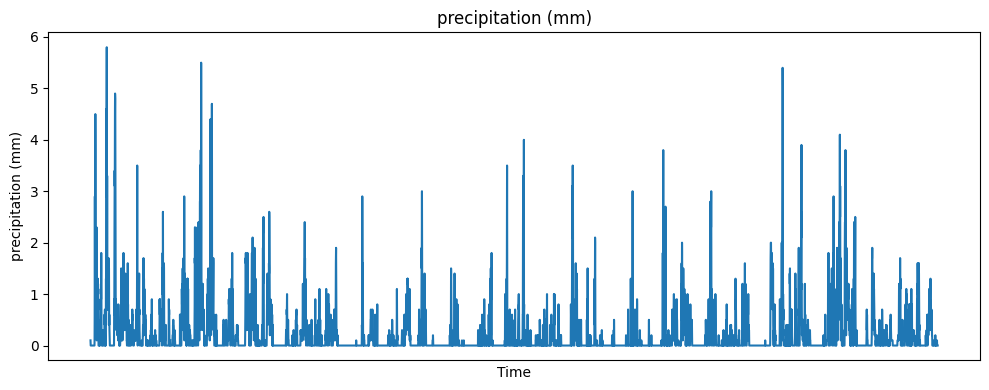

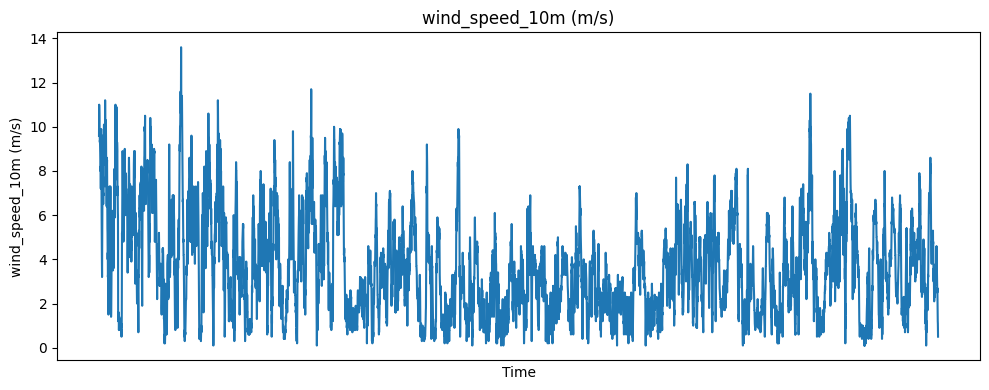

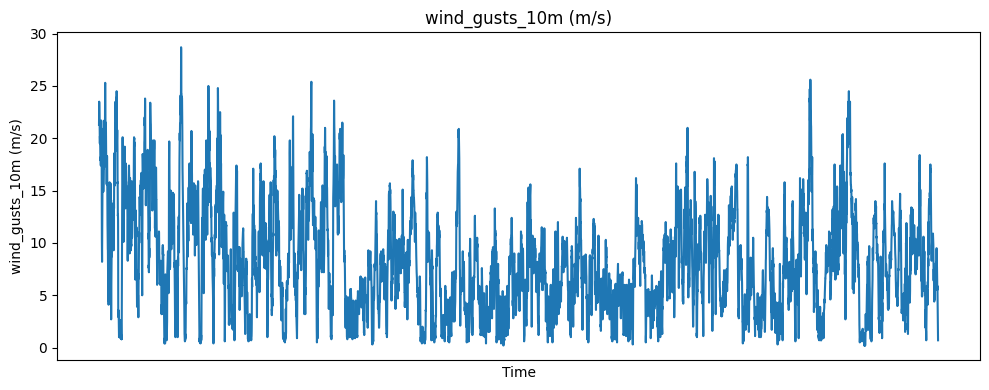

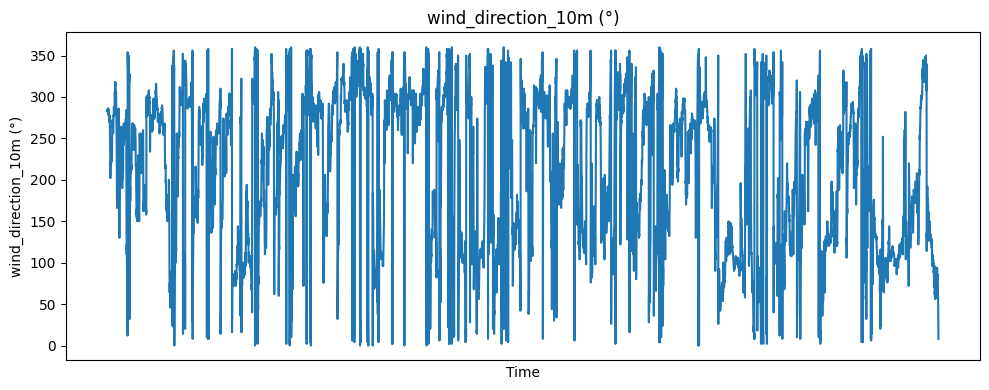

In [3]:
import matplotlib.pyplot as plt

columns_to_plot = data.columns[1:]  # Exclude 'time' column

for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    plt.plot(data['time'], data[col])
    plt.title(col)
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.xticks([], [])
    plt.tight_layout()
    plt.show()

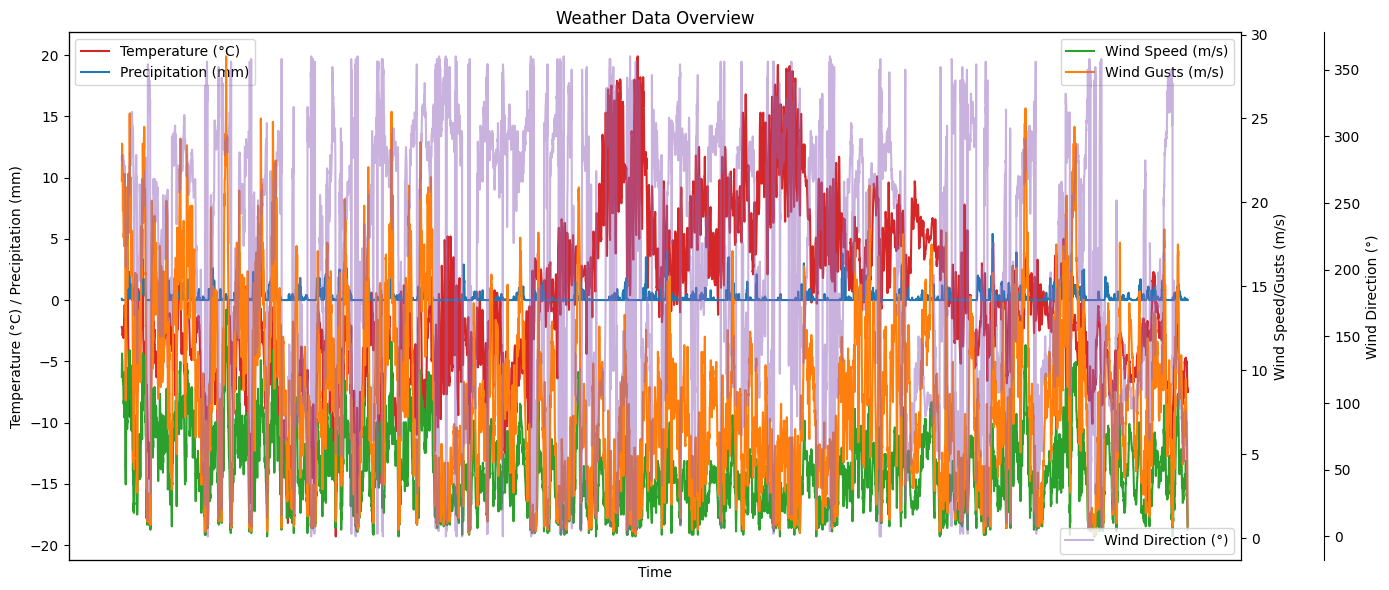

In [4]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot temperature and precipitation on left y-axis
ax1.plot(data['time'], data['temperature_2m (°C)'], label='Temperature (°C)', color='tab:red')
ax1.plot(data['time'], data['precipitation (mm)'], label='Precipitation (mm)', color='tab:blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C) / Precipitation (mm)')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for wind speed and gusts
ax2 = ax1.twinx()
ax2.plot(data['time'], data['wind_speed_10m (m/s)'], label='Wind Speed (m/s)', color='tab:green')
ax2.plot(data['time'], data['wind_gusts_10m (m/s)'], label='Wind Gusts (m/s)', color='tab:orange')
ax2.set_ylabel('Wind Speed/Gusts (m/s)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Optionally, plot wind direction as a third axis (scaled between 0-360)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(data['time'], data['wind_direction_10m (°)'], label='Wind Direction (°)', color='tab:purple', alpha=0.5)
ax3.set_ylabel('Wind Direction (°)')
ax3.legend(loc='lower right')

plt.title('Weather Data Overview')
plt.xticks([], [])  # Hide x-axis ticks for readability
plt.tight_layout()
plt.show()